# Linear Regression

## Objective

This project aiming to create supervised model that can predict the CO2 Emissions for new light-duty vehicles for retail sale in Canada and accomplish high evaluation accuracy.

## Table of contents

<ol>
    <li>Understanding the Data</li>
    <li>Reading the Data in</li>
    <li>Exploratory Data Analysis</li>
    <li>Multiple Regression Model</li>
    <li>MLR Model Prediction & Evaluation</li>
    <li>Polynomial Regression</li>
    <li>Polynomial Model Prediction & Evaluation</li>
</ol>

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Understanding the Data

#### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUELTYPE** e.g. z
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [2]:
df = pd.read_csv(r'FuelConsumptionCo2.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Exploratory Data Analysis

Lets start by Statistical description

In [3]:
df.iloc[:,1:].describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


As we can see the table above, the data is cleaned enough and no need for **Feature Normalization** since the magnitudes of the features are very close to each other.

Lets have a look at the correlations between the Numeric variables.

In [4]:
df.iloc[:,1:].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


As we can se above all numeric variables have strong correlation with our label variable **Emissions**.

Lets select some features that we want to use for regression.


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
5,3.5,6,11.9,7.7,10.0,28,230
6,3.5,6,11.8,8.1,10.1,28,232
7,3.7,6,12.8,9.0,11.1,25,255
8,3.7,6,13.4,9.5,11.6,24,267


Lets plot each of the features

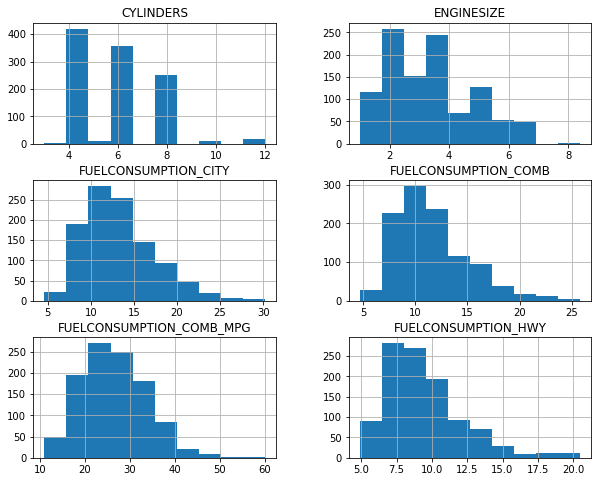

In [6]:
viz= cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
viz.hist(figsize=(10,8))
plt.show()

Lets plot EMISSION values with respect to each feature 

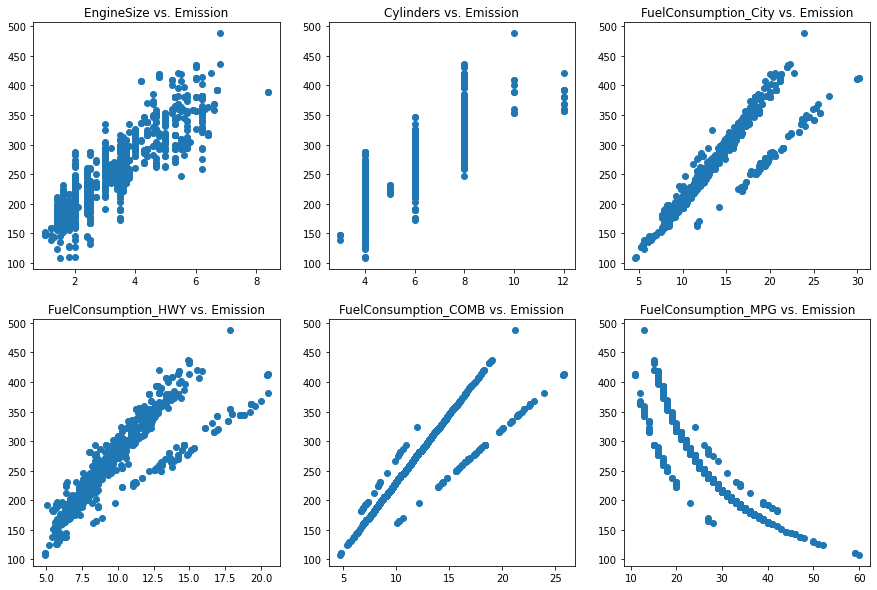

In [7]:
fig= plt.figure(figsize=(15,10))

ax0= fig.add_subplot(2,3,1)
ax1= fig.add_subplot(2,3,2)
ax2= fig.add_subplot(2,3,3)
ax3= fig.add_subplot(2,3,4)
ax4= fig.add_subplot(2,3,5)
ax5= fig.add_subplot(2,3,6)

ax0.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
ax1.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
ax2.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS)
ax3.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS)
ax4.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
ax5.scatter(cdf.FUELCONSUMPTION_COMB_MPG, cdf.CO2EMISSIONS)

ax0.set_title('EngineSize vs. Emission')
ax1.set_title('Cylinders vs. Emission')
ax2.set_title('FuelConsumption_City vs. Emission')
ax3.set_title('FuelConsumption_HWY vs. Emission')
ax4.set_title('FuelConsumption_COMB vs. Emission')
ax5.set_title('FuelConsumption_MPG vs. Emission')

plt.show()

### Feature Selection
Lets start by selecting the Regression Correlations as our Features.

In [8]:
x = np.asanyarray(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']])
y = np.asanyarray(cdf[['CO2EMISSIONS']])

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.


In [9]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y= train_test_split(x, y, test_size=0.2, random_state=4)

print('train set:', train_x.shape, train_y.shape)
print('test set:',test_x.shape, test_y.shape)

train set: (853, 6) (853, 1)
test set: (214, 6) (214, 1)


#### Train & Test data distribution
Lets have a look at the different in the distibution of each Train and Test data for Engine Size vs. Emission. 

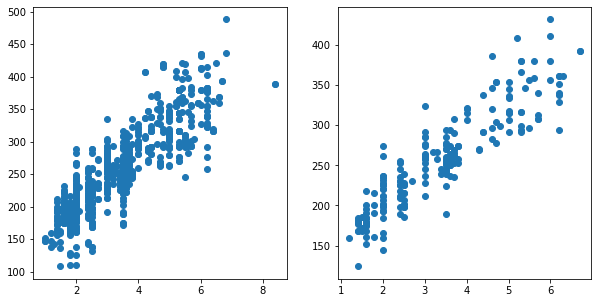

In [10]:
fig= plt.figure(figsize=(10,5))

ax0= fig.add_subplot(1,2,1)
ax1= fig.add_subplot(1,2,2)

ax0.scatter(train_x[:,0],train_y)
ax1.scatter(test_x[:,0],test_y)
plt.show()

## Multiple Regression Model


Since we have multiple features as independent variables we are going to use MLR: Multiple Linear Regression Model

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercepts: ', regr.intercept_)

Coefficients:  [[ 8.63886184  7.43864929  9.33421912 -6.07577623  0.5417976  -3.86786543]]
Intercepts:  [254.00752683]


$\theta_n$ **Coefficients** and $\theta_0$ **Intercept** , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 5 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane,<br>
Where the hypothesis $h_{\theta} (x)$ for MLR is:
> $ h_{\theta} (x)= \theta^T x = \theta_0 + \theta_1 x_1 + \theta_n x_n$



sklearn can estimate these parameters $\theta$ values from our data. Scikit-learn uses plain **Ordinary Least Squares OLS** method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

```
- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
```


### Prediction & Evaluation
Lets evaluate the accuracy of our built model after predicting the test split data, by using the following metrics:

- **Mean Absolute Error MAE:** It is the mean of the absolute value of the errors. it's non negative and values close to zero are better.
> $ MAE = \frac{1}{n} \sum \limits_{i=1}^n |y_i - \hat{y_i}| $

- **Mean Squared Error MSE:** The average squared difference between the estimated values and true value. it's non negative and values close to zero are better.
> $ MSE = \frac{1}{n} \sum \limits_{i=1}^n (y_i - \hat{y_i})^2 $

- **R-squared score** is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
> $ R^2= 1 - \frac{SS_{res}}{SS_{tot}} $
        
    Where; $SS_{res}$ is the sum of squares of the residual errors. And $SS_{tot}$ is the total sum of the errors.

In [12]:
y_hat= regr.predict(test_x)

import sklearn.metrics as metrics 

print('Mean Absolute Error MAE: %.2f' %metrics.mean_absolute_error(y_hat,test_y))
print('MSE: %.2f' % metrics.mean_squared_error(y_hat, test_y))
print('Variance score: %.2f' % metrics.r2_score(test_y,y_hat))

Mean Absolute Error MAE: 11.65
MSE: 330.18
Variance score: 0.91


## Polynomial Regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

> $y = b + \theta_1  x + \theta_2 x^2$

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

#### Feature Selection

Lets use the same selected features and compare the accuracy of each MLR and Polynomial models.

In [15]:
x = np.asanyarray(cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']])
y = np.asanyarray(cdf[['CO2EMISSIONS']])

#### Train and Test Split
And lets use the same split size as well

In [16]:
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size=0.2, random_state=4)

print('train set:', train_x.shape, train_y.shape)
print('test set:',test_x.shape, test_y.shape)

train set: (853, 6) (853, 1)
test set: (214, 6) (214, 1)


In [17]:
degrees=10 
dict={}
for d in range(1,degrees):
    poly = PolynomialFeatures(degree = d)
    
    train_x_poly = poly.fit_transform(train_x)
    
    clf = linear_model.LinearRegression()
    clf.fit(train_x_poly, train_y)
    
    test_x_poly = poly.fit_transform(test_x)
    y_ = clf.predict(test_x_poly)
    
    dict[d]= metrics.r2_score(test_y, y_)
d= sorted(dict, key=dict.get,reverse=True)[0]
d

3

In [18]:
poly = PolynomialFeatures(degree = d)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 5.66417270e-03 -1.34359217e+02 -2.93019855e+02  2.92548807e+03
  -1.62018844e+02 -2.37512208e+03  1.73892879e+02 -2.04989533e+02
   4.83271515e+01  2.81937650e+03 -1.38823269e+03 -1.34313060e+03
   9.80253811e+00  4.89858724e+01 -1.51792129e+03  7.18252385e+02
   8.19879055e+02  3.82399754e+00  3.96079151e+04 -4.41001074e+04
  -3.59501826e+04 -2.90635317e+01  1.21930330e+04  2.00554495e+04
  -3.07229023e+01  8.17164568e+03  6.16647146e+01 -1.87071949e+00
  -1.05446980e+01  5.40008008e+00 -1.08826683e+02  8.00689383e+01
   4.38416754e+01  2.69718732e+00  4.42348043e+00  2.14888568e+02
  -1.32407024e+02 -9.27429031e+01  1.66053487e-01 -5.30941835e+03
   5.54885047e+03  4.99473307e+03 -5.81347581e+01 -1.45316016e+03
  -2.61180113e+03  2.92916512e+01 -1.17171004e+03  2.66449819e+01
  -8.59532920e-02 -1.47692840e+00 -1.39918668e+02  7.57791766e+01
   6.38124927e+01 -1.12889689e+00  4.05657622e+03 -4.29075927e+03
  -3.71191804e+03  3.13395403e+01  1.13984684e+03  1.95806686

In [19]:
test_x_poly = poly.fit_transform(test_x)
y_ = clf.predict(test_x_poly)

print('Mean Absolute Error MAE: %.2f' %metrics.mean_absolute_error(y_, test_y))
print('MSE: %.2f' % metrics.mean_squared_error(y_ , test_y))
print('R-squared: %.2f' % metrics.r2_score(test_y, y_))

Mean Absolute Error MAE: 7.59
MSE: 173.06
R-squared: 0.95


## Results

So, our evaluation can be shown as the following: 
<br>

<table align="left" style="width: 40%">
  <tr align="left">
    <th>Model</th>
    <th>MAE</th> 
    <th>MSE</th>
    <th>R2</th>
  </tr>
  <tr>
    <td>MLR</td>
    <td>11.65</td>
    <td>330.18</td>
    <td>0.91</td>
  </tr>
  <tr>
    <td>Polynomial Reg.</td>
    <td>7.59</td>
    <td>173.06</td>
    <td>0.95</td>
  </tr>
</table>

And we can observe that **Polynomial Regression** is more optimum for our data set to predict the CO2 Emissions